Import libraries we will use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Now we can read our data from files

`train_data` is data with some noises which we will learn from.

`val_data` is data with no noises and we can calculate cost function from it to evaluate our model.

In [2]:
train_data = pd.read_csv("train_data.txt", sep=" ", header=None)
val_data = pd.read_csv("val_data.txt", sep=" ", header=None)


And define some variables

In [3]:
train_X = np.array(train_data[[0]]).reshape(-1, 1)
train_y = np.array(train_data[[1]]).reshape(-1, 1)
val_X = np.array(val_data[[0]]).reshape(-1, 1)
val_y = np.array(val_data[[1]]).reshape(-1, 1)


`plot()` function is to graphically see what has happened.

we will only use this function on 1-variable linear regression since it will be hard to visualize 2 or more features on a 2d monitor.

In [4]:
def plot(theta, mu, sigma):
    plt.scatter(train_data[[0]], train_data[[1]])
    plt.plot(val_data[[0]], val_data[[1]], color="y")
    xx = np.linspace(0, 10000, 1000)
    plt.plot(xx, theta[0][0] +
             (xx - mu)/sigma*theta[1][0], color="r")

    plt.show()


Next is the most important code of all in this notebook.

With `X`, `y` and `theta` provided, we can perform gradient descent to find optimum solution.

Vectorization has been used to make the code shorter and to improve readability 

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)

    for _ in range(num_iters):
        h = X @ theta  # m x 1 matrix
        delta = (X.T @ (h - y)) / m  # 2 x 1 matrix
        theta = theta - alpha*delta

    return theta


Before we do actual gradient descent, it is important that we normalized our feature matrix.

Without normalization, it will take longer path around in order to get to the optimum solution.

In [6]:
mu = np.mean(train_X)
sigma = np.std(train_X)
train_X = (train_X - mu)/sigma
train_X = np.c_[np.ones((len(train_X))), train_X]


Finally, run the gradient descent and plot the result

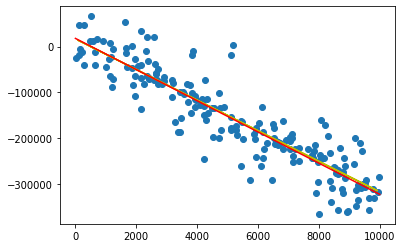

In [7]:
theta = gradientDescent(train_X, train_y, [[0], [0]], 0.1, 500)
plot(theta, mu, sigma)


Now let's calculate our model's error with MSE(Mean Squared Error) and MAE(Mean Absolute Error).

In [8]:
def meanSquaredError(X, y, theta):
    E = (X @ theta)-y
    return (E.T @ E)[0, 0] / (2*y.size)


def meanAbsoluteError(X, y, theta):
    return np.average(np.absolute((X @ theta)-y))


In [9]:
val_X = (val_X - mu) / sigma
val_X = np.c_[np.ones((len(val_X))), val_X]


In [10]:
print(meanSquaredError(val_X, val_y, theta))
print(meanAbsoluteError(val_X, val_y, theta))


4136722.3377445936
2354.327409113239


Next, we will do the very same thing with more features in our data

To start, we read the data into our system

In [11]:
train_data_multi = pd.read_csv("train_data_multi.txt", sep=" ", header=None)
val_data_multi = pd.read_csv("val_data_multi.txt", sep=" ", header=None)


The data contains 5 columns and we will predict how the last column changes as other values change. 

We first split the data into `X` and `y` just like we did with the single-feature regressor.

In [12]:
train_X_multi = np.array(train_data_multi[[0, 1, 2, 3,4]]).reshape(-1, 5)
train_y_multi = np.array(train_data_multi[[5]]).reshape(-1, 1)
val_X_multi = np.array(val_data_multi[[0, 1, 2, 3,4]]).reshape(-1, 5)
val_y_multi = np.array(val_data_multi[[5]]).reshape(-1, 1)


And don't forget to normalize our data.

In [13]:
mu_multi = np.mean(train_X_multi, axis=0)
sigma_multi = np.std(train_X_multi, axis=0).reshape(5,1)
train_X_multi = ((train_X_multi - mu_multi).T /sigma_multi).T
train_X_multi = np.c_[np.ones((len(train_X_multi))), train_X_multi]

We now perform gradient descent on our train data.

In [14]:
theta_multi = gradientDescent(train_X_multi, train_y_multi, np.zeros((6,1)), 0.1, 100)


Normalize validator data

In [15]:
val_X_multi = ((val_X_multi - mu_multi).T / sigma_multi).T
val_X_multi = np.c_[np.ones((len(val_X_multi))), val_X_multi]

Print MSE and MAE of our model

In [16]:
print(meanSquaredError(val_X_multi, val_y_multi, theta_multi))
print(meanAbsoluteError(val_X_multi, val_y_multi, theta_multi))

27632189.29156031
6078.783534218906
